# Vagrant Information

## Imports

In [1]:
import pandas as pd
import datetime
from matplotlib import pyplot as plt
%matplotlib inline
# Seaborn for plotting and styling
import seaborn as sns
import json
from ast import literal_eval

## Analysis

### Vagrant Bug History

In [2]:
with open("../code/issues/issue_results.json") as f:
    issue_data = json.load(f)

In [3]:
bug_results = {}
bug_results['Created Bugs'] = {}
bug_results['Closed Bugs'] = {}
for item in issue_data:
    create_year = datetime.datetime.strptime(item['created_at'], "%Y-%m-%dT%H:%M:%SZ").date().year
    closed_year = datetime.datetime.strptime(item['closed_at'], "%Y-%m-%dT%H:%M:%SZ").date().year
    if create_year not in bug_results['Created Bugs']:
        bug_results['Created Bugs'][create_year] = 0
    else:
        bug_results['Created Bugs'][create_year] += 1
    if closed_year not in bug_results['Closed Bugs']:
        bug_results['Closed Bugs'][closed_year] = 0
    else:
        bug_results['Closed Bugs'][closed_year] += 1

In [4]:
df_dates = pd.DataFrame.from_dict(bug_results)

In [5]:
# Create a dataframe of all of the unique commits (i.e. links) between developers and the corresponding folders
graph_df = pd.read_csv("../Neo4j_output/Developer_File_Output.csv")

new_columns = {}

# Generate binary classification for our dataframe based on if a developer 
# introduced a bug or not with the corresponding commit
for index in graph_df.index:
    if graph_df.loc[index, "Bug"] != "INTRODUCED_NEW_BUG":
        graph_df.loc[index, "Bug"] = 0
    else:
        graph_df.loc[index, "Bug"] = 1
        
    # separate each node2vec embedding into it's own unique label
    embeddings = literal_eval(graph_df.loc[index, 'n2vEmbedding'])
    for i, embedding in enumerate(embeddings):
        if f"emb_{i}" not in new_columns:
            new_columns[f"emb_{i}"] = []
            new_columns[f"emb_{i}"].append(embedding)
        else:
            new_columns[f"emb_{i}"].append(embedding)

# delete the n2vEmbedding label, as the list has now been separated into their own unique labels 
del graph_df['n2vEmbedding']
temp_df = pd.DataFrame.from_dict(new_columns)
graph_df = graph_df.join(temp_df)
            
x = graph_df["Name"]
y = graph_df["Bug"]

In [6]:
df_dates

,Created Bugs,Closed Bugs
2021,1,4
2020,33,66
2019,50,46
2018,90,118
2017,110,207
2016,321,301
2015,485,460
2014,254,155
2013,75,72
2012,34,28


In [7]:
graph_df

,Name,File,Bug,PageRank,Betweenness,Closeness,Harmonic,Degree,communityId,emb_0,...,emb_118,emb_119,emb_120,emb_121,emb_122,emb_123,emb_124,emb_125,emb_126,emb_127
0,Brian Flad,.hashibot.hcl,0,0.152661,0.000000,0.437687,0.452340,3.0,19,-0.631887,...,-0.966069,-0.462440,0.553519,-0.668635,-0.724869,0.293141,0.685843,-0.322144,0.559224,-0.706804
1,Brian Flad,.github/workflows/lock.yml,0,0.152661,0.000000,0.437687,0.452340,3.0,19,-0.631887,...,-0.966069,-0.462440,0.553519,-0.668635,-0.724869,0.293141,0.685843,-0.322144,0.559224,-0.706804
2,sophia,test/unit/plugins/providers/docker/driver_test.rb,0,15.076363,14312.134422,0.613494,0.683830,13369.0,288,-0.031873,...,0.087964,-0.200916,0.150716,0.204151,0.056801,0.257253,0.014377,-0.017248,0.135168,-0.099590
3,sophia,plugins/providers/docker/driver.rb,0,15.076363,14312.134422,0.613494,0.683830,13369.0,288,-0.031873,...,0.087964,-0.200916,0.150716,0.204151,0.056801,0.257253,0.014377,-0.017248,0.135168,-0.099590
4,sophia,plugins/providers/docker/driver.rb,0,15.076363,14312.134422,0.613494,0.683830,13369.0,288,-0.031873,...,0.087964,-0.200916,0.150716,0.204151,0.056801,0.257253,0.014377,-0.017248,0.135168,-0.099590
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44234,Chris Roberts,plugins/kernel_v2/config/vm_trigger.rb,1,36.639598,204513.134274,0.775794,0.854043,75315.0,19,0.022263,...,-0.172384,-0.115931,0.091304,0.070052,-0.146962,0.032353,0.002859,-0.052441,-0.129638,0.101881
44235,Chris Roberts,lib/vagrant/action/hook.rb,1,36.639598,204513.134274,0.775794,0.854043,75315.0,19,0.022263,...,-0.172384,-0.115931,0.091304,0.070052,-0.146962,0.032353,0.002859,-0.052441,-0.129638,0.101881
44236,Chris Roberts,test/unit/vagrant/plugin/v2/trigger_test.rb,1,36.639598,204513.134274,0.775794,0.854043,75315.0,19,0.022263,...,-0.172384,-0.115931,0.091304,0.070052,-0.146962,0.032353,0.002859,-0.052441,-0.129638,0.101881
44237,Chris Roberts,lib/vagrant/action/builder.rb,1,36.639598,204513.134274,0.775794,0.854043,75315.0,19,0.022263,...,-0.172384,-0.115931,0.091304,0.070052,-0.146962,0.032353,0.002859,-0.052441,-0.129638,0.101881


In [8]:
sns.set_style("darkgrid")

<AxesSubplot:>

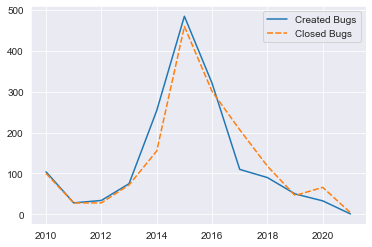

In [10]:
sns.lineplot(data=df_dates)

### Vagrant Folder Bug Info

In [11]:
df = pd.read_csv('../Neo4j_output/Folder_Rank_by_Bugs.csv')

In [12]:
df = df.sort_values(by="Number_of_Bugs")

In [13]:
df

,Number_of_Bugs,Folder_Name
0,1,website
307,1,website/{www/source/stylesheets/_mixins.less =...
306,1,website/{www/source/stylesheets/_type.less => ...
305,1,website/{www/source/javascripts/vagrantup.js =...
304,1,website/{www/source/javascripts/Sidebar.js => ...
...,...,...
2,39,lib/vagrant/util
20,40,lib
67,87,templates/locales
1,105,RootDir


In [14]:
with open('FolderBugs.tex', 'w') as tf:
     tf.write(df.to_latex(index=False))

## Project Statistics

In [15]:
num_changes = len(graph_df.index)
num_defects = len(graph_df[graph_df['Bug'] == 1].index)
print(num_changes)
print(num_defects)

print(f"Percentage of defects: {(num_changes/num_defects):.2f}%")

44239
3392
Percentage of defects: 13.04%


In [18]:
dates = list(df_dates.index.values)
most_recent_date = max(dates)
oldest_date = min(dates)
print(most_recent_date)
print(oldest_date)

2021
2010
